# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/vetrirah/customer/data](https://www.kaggle.com/datasets/vetrirah/customer/data)*

In [ ]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("target_group_data.csv")
df

,Age,Work_Experience,Family_Size,Group
0,22,1.0,4.0,D
1,67,1.0,1.0,B
2,67,0.0,2.0,B
3,56,0.0,2.0,C
4,32,1.0,3.0,C
...,...,...,...,...
6660,41,0.0,5.0,B
6661,35,3.0,4.0,D
6662,33,1.0,1.0,D
6663,27,1.0,4.0,B


In [ ]:
# Schritt 2: Analysiere die Daten mithilfe von '.describe()'.
df.describe()

,Age,Work_Experience,Family_Size
count,6665.000000,6665.000000,6665.000000
mean,43.536084,2.629107,2.841110
std,16.524054,3.405365,1.524743
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [ ]:
# Schritt 3: Nutze .value_counts(), um die Häufigkeit jeder Klasse in der Spalte "Group" anzuzeigen.
df["Group"].value_counts()

D    1757
C    1720
A    1616
B    1572
Name: Group, dtype: int64

<Axes: xlabel='Group', ylabel='Count'>

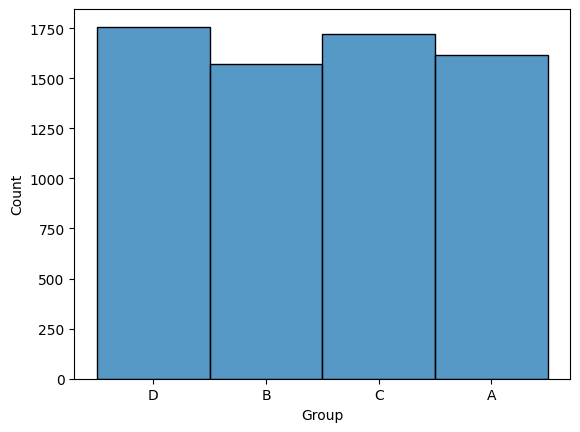

In [ ]:
import seaborn as sns

# Schritt 4: Erstelle ein Histogramm, um die Häufigkeit jeder Klasse in der Spalte "Group" zu visualisieren.
sns.histplot(df["Group"])

# Daten aufteilen

In [ ]:
# Schritt 5: Weise die entsprechenden Features der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.
# Tipp: Verwende '.copy()' und '.pop()'.
X = df.copy()
y = X.pop("Group")

In [ ]:
X

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,67,1.0,1.0
2,67,0.0,2.0
3,56,0.0,2.0
4,32,1.0,3.0
...,...,...,...
6660,41,0.0,5.0
6661,35,3.0,4.0
6662,33,1.0,1.0
6663,27,1.0,4.0


In [ ]:
y

0       D
1       B
2       B
3       C
4       C
       ..
6660    B
6661    D
6662    D
6663    B
6664    B
Name: Group, Length: 6665, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

# Schritt 6: Teile die Daten in Trainings- und Testdaten auf. Die Testdaten sollten 20% des Gesamtdatensatzes ausmachen und prozentual dieselbe Anzahl von Klassen wie die Trainingsdaten enthalten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
# Schritt 7: Verwende .value_counts(), um den prozentualen Anteil jeder Klasse in y_train anzuzeigen.
y_train.value_counts() / len(y_train)

D    0.263691
C    0.258065
A    0.242498
B    0.235746
Name: Group, dtype: float64

In [ ]:
# Schritt 8: Verwende .value_counts(), um den prozentualen Anteil jeder Klasse in y_test anzuzeigen.
y_test.value_counts() / len(y_test)

D    0.263316
C    0.258065
A    0.242311
B    0.236309
Name: Group, dtype: float64

# Modell trainieren

In [ ]:
from sklearn.linear_model import LogisticRegression

# Schritt 9: Trainiere das Modell auf den Trainingsdaten.
# Anmerkung: Die gewählten Modellparameter 'multi_class' und 'solver' ermöglichen die Durchführung einer Mehrklassen-Klassifikation.
model = LogisticRegression(multi_class="multinomial", solver="newton-cg", random_state=0)
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

# Vorhersagen

In [ ]:
# Schritt 10: Nutze das trainierte Modell, um Vorhersagen für X_test zu generieren.
y_predict = model.predict(X_test)

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Schritt 11: Berechne die Accuracy basierend auf den Testdaten und den Vorhersagen.
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.41785446361590395


# Confusion Matrix

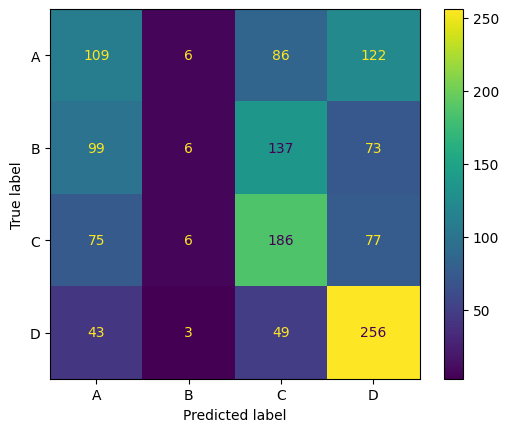

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Schritt 12: Erstelle eine Confusion Matrix basierend auf den Testdaten und den Vorhersagen, um detailliert zu analysieren, welche Fehler das Modell gemacht hat.
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# Precision, Recall und F1-Score (Klassenspezifisch)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Schritt 13: Setze den average-Parameter entsprechend, um die Klassenspezifischen Precisions, Recalls und f1-Scores zu berechnen.
precisions = precision_score(y_test, y_predict, average=None)
recalls = recall_score(y_test, y_predict, average=None)
f1 = f1_score(y_test, y_predict, average=None)

print("Precisions: ", precisions)
print("Recalls: ", recalls)
print("F1-Scores: ", f1)

Precisions:  [0.33435583 0.28571429 0.40611354 0.48484848]
Recalls:  [0.3374613  0.01904762 0.54069767 0.72934473]
F1-Scores:  [0.33590139 0.03571429 0.4638404  0.58248009]


# Precision, Recall und F1-Score (Macro-Average)

In [ ]:
# Schritt 14: Setze den average-Parameter entsprechend, um die Macro-Precision, den Macro-Recall und den Macro-f1-Score zu berechnen.
macro_precision = precision_score(y_test, y_predict, average="macro")
macro_recall = recall_score(y_test, y_predict, average="macro")
macro_f1 = f1_score(y_test, y_predict, average="macro")

print("Macro-Precision: ", macro_precision)
print("Macro-Recall: ", macro_recall)
print("Macro_F1: ", macro_f1)

Macro-Precision:  0.3777580339753833
Macro-Recall:  0.4066378307801376
Macro_F1:  0.35448404061953454


# Precision, Recall und F1-Score (Weighted-Average)

In [ ]:
# Schritt 15: Setze den average-Parameter entsprechend, um die Weighted-Precision, den Weighted-Recall und den Weighted-f1-Score zu berechnen.
weighted_precision = precision_score(y_test, y_predict, average="weighted")
weighted_recall = recall_score(y_test, y_predict, average="weighted")
weighted_f1 = f1_score(y_test, y_predict, average="weighted")

print("Weighted-Precision: ", weighted_precision)
print("Weighted-Recall: ", weighted_recall)
print("Weighted_F1: ", weighted_f1)

Weighted-Precision:  0.3810066072510987
Weighted-Recall:  0.41785446361590395
Weighted_F1:  0.36290904510287103


# Precision, Recall und F1-Score (Micro-Average)

In [ ]:
# Schritt 16: Setze den average-Parameter entsprechend, um die Micro-Precision, den Micro-Recall und den Micro-f1-Score zu berechnen.
micro_precision = precision_score(y_test, y_predict, average="micro")
micro_recall = recall_score(y_test, y_predict, average="micro")
micro_f1 = f1_score(y_test, y_predict, average="micro")

print("Micro-Precision: ", micro_precision)
print("Micro-Recall: ", micro_recall)
print("Micro_F1: ", micro_f1)

Micro-Precision:  0.41785446361590395
Micro-Recall:  0.41785446361590395
Micro_F1:  0.41785446361590395


# Classification Report ausgeben

In [ ]:
from sklearn.metrics import classification_report

# Schritt 17: Erzeuge einen Klassifikationsbericht basierend auf den Testdaten und den Vorhersagen.
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           A       0.33      0.34      0.34       323
           B       0.29      0.02      0.04       315
           C       0.41      0.54      0.46       344
           D       0.48      0.73      0.58       351

    accuracy                           0.42      1333
   macro avg       0.38      0.41      0.35      1333
weighted avg       0.38      0.42      0.36      1333

